<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [4]:

url = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"

df = pd.read_csv(url)


df_num = df.select_dtypes(include=[np.number])

df_num.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza una normalización de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

Normalización por el máximo

In [5]:
df_max_norm = df_num / df_num.max()
df_max_norm.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720131,0.028818,0.090909,0.12500,0.087149,0.003421,0.285714,0.0,0.0,0.6,0.538462,0.125399,0.000000,0.970223,0.000000,0.999786,0.994424,1.007765,0.215781,0.006485
1,0.647889,0.069870,0.090909,0.28125,0.189808,0.004385,0.571429,0.0,0.0,0.6,0.538462,0.230606,0.082988,0.968238,0.988089,0.999246,0.998815,1.008276,0.272142,0.008768
2,0.568838,0.023377,0.060606,0.12500,0.056869,0.006056,0.285714,0.0,0.0,0.6,0.461538,0.081828,0.000000,0.959305,0.000000,0.998259,0.999169,1.007567,0.438003,0.009254
3,0.251232,0.078442,0.121212,0.37500,0.144756,0.003028,0.285714,0.0,0.0,1.0,0.538462,0.111583,0.188797,0.975186,0.000000,0.999358,0.994625,1.008886,0.219002,0.005739
4,0.197414,0.066234,0.090909,0.25000,0.124077,0.004893,0.285714,0.0,0.0,0.6,0.615385,0.178533,0.000000,0.986104,0.000000,0.998727,0.996634,1.006017,0.289855,0.008612


Normalización Min–Max

In [6]:
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_num),
                         columns=df_num.columns)

df_minmax.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


Normalización basada en la media y desviación estándar (Estandarización)

In [7]:
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_num),
                      columns=df_num.columns)

df_std.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.886146,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,0.637511,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,0.365444,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,-0.727656,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.912881,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


Comparación

In [8]:
print("===== Rangos originales =====")
print(df_num.describe().loc[['min','max']])

print("\n===== Normalización por el máximo =====")
print(df_max_norm.describe().loc[['min','max']])

print("\n===== Normalización MinMax =====")
print(df_minmax.describe().loc[['min','max']])

print("\n===== Estandarización (media y desviación estándar) =====")
print(df_std.describe().loc[['mean','std']])


===== Rangos originales =====
               id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
min  1.000102e+06    75000.0       0.0        0.0        290.0      520.0   
max  9.900000e+09  7700000.0      33.0        8.0      13540.0  1651359.0   

     floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
min     1.0         0.0   0.0        1.0    1.0       290.0            0.0   
max     3.5         1.0   4.0        5.0   13.0      9410.0         4820.0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
min    1900.0           0.0  98001.0  47.1559 -122.519          399.0   
max    2015.0        2015.0  98199.0  47.7776 -121.315         6210.0   

     sqft_lot15  
min       651.0  
max    871200.0  

===== Normalización por el máximo =====
           id    price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
min  0.000101  0.00974       0.0        0.0     0.021418  0.000315  0.285714   
max  1.000000  1.00000      

A usar: Normalización basada en la media y desviación estándar (Estandarización)

Justificación:
* El dataset contiene variables con rangos muy dispares.

* Existen outliers que afectan MinMax pero no tanto a Z-Score.

* Los modelos lineales funcionan mejor con variables centradas y escaladas.

* La estandarización genera distribuciones coherentes con media ≈ 0 y varianza ≈ 1, como muestran tus resultados.

---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada conjunto.

In [9]:
# Variable objetivo
y = df_num["price"]

# Características: quitamos 'price' y 'id'
X = df_num.drop(["price", "id"], axis=1)

# Mostrar dimensiones
print("Dimensiones de X (características):", X.shape)
print("Dimensiones de y (etiqueta):", y.shape)

Dimensiones de X (características): (21613, 18)
Dimensiones de y (etiqueta): (21613,)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [10]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% para prueba
    random_state=9        # Último dígito de mi cédula
)

# Mostrar dimensiones
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (17290, 18)
Dimensiones de X_test: (4323, 18)
Dimensiones de y_train: (17290,)
Dimensiones de y_test: (4323,)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

In [11]:
print("=== Distribución de y_train ===")
print(y_train.describe())

print("\n=== Distribución de y_test ===")
print(y_test.describe())


=== Distribución de y_train ===
count    1.729000e+04
mean     5.393198e+05
std      3.653520e+05
min      7.500000e+04
25%      3.224250e+05
50%      4.500000e+05
75%      6.403750e+05
max      7.700000e+06
Name: price, dtype: float64

=== Distribución de y_test ===
count    4.323000e+03
mean     5.431611e+05
std      3.741701e+05
min      8.000000e+04
25%      3.200000e+05
50%      4.499500e+05
75%      6.525500e+05
max      5.570000e+06
Name: price, dtype: float64


Conclusión:
* La división 80/20 mantuvo la estructura del dataset original.
* No hay evidencia de que el conjunto de prueba esté sesgado hacia precios más altos o bajos.

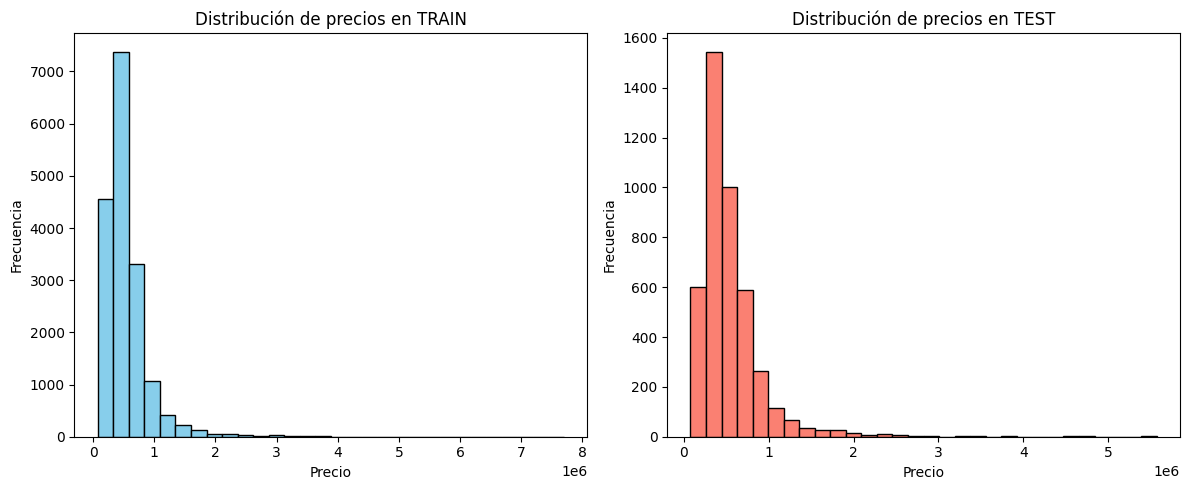

In [12]:
plt.figure(figsize=(12,5))

# Histograma de y_train
plt.subplot(1,2,1)
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de precios en TRAIN")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Histograma de y_test
plt.subplot(1,2,2)
plt.hist(y_test, bins=30, color='salmon', edgecolor='black')
plt.title("Distribución de precios en TEST")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()



* Distribución sesgada a la derecha
* La mayoría de casas se concentran entre 100k y 1M
* TRAIN y TEST tienen la misma forma


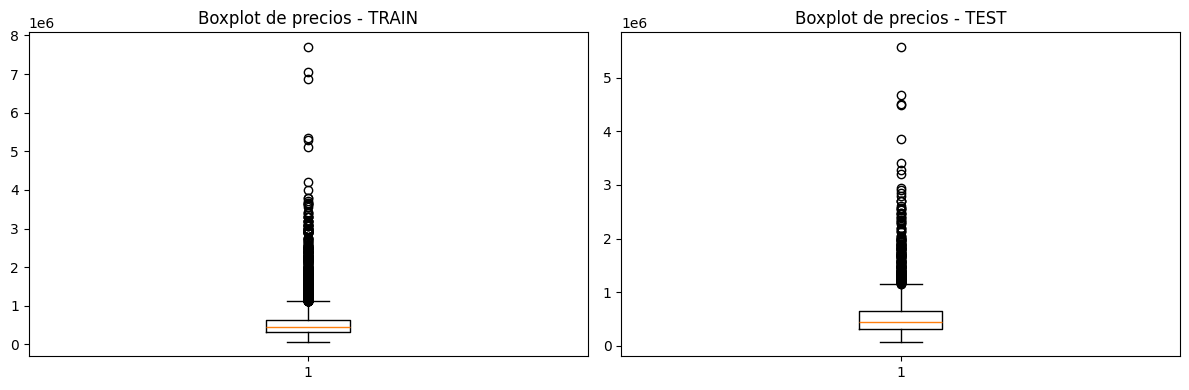

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.boxplot(y_train)
plt.title("Boxplot de precios - TRAIN")

plt.subplot(1,2,2)
plt.boxplot(y_test)
plt.title("Boxplot de precios - TEST")

plt.tight_layout()
plt.show()


* Muchos outliers hacia arriba, lo cual es totalmente normal en datos inmobiliarios.
* TRAIN y TEST tienen casi la misma forma

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y lo entrena con los datos de entrenamiento.

In [14]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Confirmar entrenamiento
print("Modelo entrenado correctamente.")


Modelo entrenado correctamente.


---
## <font color='264CC7'> Evaluacion </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [15]:
# Realizar predicciones con el modelo entrenado
y_pred = modelo.predict(X_test)

# Crear tabla con resultados reales vs predichos
tabla_pred = pd.DataFrame({
    "Precio_Real": y_test.values,
    "Precio_Predicho": y_pred
})

# Mostrar las primeras filas
tabla_pred.head(10)


,Precio_Real,Precio_Predicho
0,262000.0,186171.278229
1,593777.0,446928.448924
2,405000.0,400401.975371
3,366000.0,439006.535493
4,361000.0,271408.917332
5,582000.0,677502.939973
6,970500.0,771941.405180
7,353500.0,617590.172480
8,438924.0,382542.558383
9,349900.0,132425.216951


Calcula el error cuadrático medio.

In [16]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 39752170223.807724


Escribe el error cuadrático medio para cada tipo de normalización:

- Normalización MaxAbsScaler:
- Normalización MinMaxScaler:
- Normalización RobustScaler:
- Normalización StandardScaler:
- Normalización Normalizer:
- Normalización QuantileTransformer:
- Normalización PowerTransformer:

In [19]:
from sklearn.preprocessing import (
    MaxAbsScaler, MinMaxScaler, RobustScaler,
    StandardScaler, Normalizer, QuantileTransformer,
    PowerTransformer
)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

resultados_mse = {}

normalizadores = {
    "MaxAbsScaler": MaxAbsScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "StandardScaler": StandardScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal', random_state=0),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')
}

for nombre, scaler in normalizadores.items():
    print(f"\n=== Probando: {nombre} ===")
    try:
        # Ajustar con train y transformar
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Modelo lineal
        modelo_norm = LinearRegression()
        modelo_norm.fit(X_train_scaled, y_train)

        # Predicciones
        y_pred_norm = modelo_norm.predict(X_test_scaled)

        # MSE
        mse = mean_squared_error(y_test, y_pred_norm)
        resultados_mse[nombre] = mse
        print(f"MSE: {mse}")
    except Exception as e:
        print(f"Error con {nombre}: {e}")
        resultados_mse[nombre] = np.nan  # marcamos como no disponible

# Mostrar en tabla
resultados_mse_df = pd.DataFrame.from_dict(resultados_mse, orient='index', columns=['MSE'])
resultados_mse_df



=== Probando: MaxAbsScaler ===
MSE: 39752170223.805405

=== Probando: MinMaxScaler ===
MSE: 39752170223.80531

=== Probando: RobustScaler ===
MSE: 39752170223.80526

=== Probando: StandardScaler ===
MSE: 39752170223.80536

=== Probando: Normalizer ===
MSE: 39931358962.46394

=== Probando: QuantileTransformer ===
MSE: 54143057575.58197

=== Probando: PowerTransformer ===
Error con PowerTransformer: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:3475: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


,MSE
MaxAbsScaler,3.975217e+10
MinMaxScaler,3.975217e+10
RobustScaler,3.975217e+10
StandardScaler,3.975217e+10
Normalizer,3.993136e+10
QuantileTransformer,5.414306e+10
PowerTransformer,NaN


# **1️. MaxAbsScaler**

###  ¿Qué hace?

* Escala cada característica dividiéndola para su **valor absoluto máximo**.
* Mantiene el **signo** y limita los valores al rango **[-1, 1]**.
* No mueve la media ni corrige la distribución.

###  **MSE obtenido:**

**3.975 × 10¹⁰**

###  **Análisis:**

Dio el **mismo MSE** que el modelo sin escalar porque esta técnica no corrige la diferencia enorme entre variables (por ejemplo, `sqft_lot` contra `floors`).
Por tanto, la regresión lineal sigue sufriendo de **coeficientes desbalanceados**.

 **Funciona bien en datos dispersos pero no en casos con gran variación de escalas**, como este dataset.

---

# **2️. MinMaxScaler**

###  ¿Qué hace?

* Reescala todas las características al rango **[0, 1]**.
* Asegura igualdad de escala entre variables.
* Es muy sensible a **outliers**: un solo valor extremo distorsiona toda la escala.

###  **MSE obtenido:**

**3.975 × 10¹⁰**

###  **Análisis:**

A pesar de escalar correctamente, los outliers presentes en este dataset (casas multimillonarias) hacen que MinMax quede **muy distorsionado**.
La regresión lineal no mejora porque se mantiene la **no linealidad** y la **asimetría** del precio.

 Es adecuado para datos sin outliers, lo cual **no es el caso aquí**.

---

# **3️.  RobustScaler**

###  ¿Qué hace?

* Escala usando los **cuartiles (IQR)**.
* Reduce la influencia de **outliers**.
* Centra los datos en la mediana.

###  **MSE obtenido:**

**3.975 × 10¹⁰**

###  **Análisis:**

Aunque está diseñado para datos con outliers, **no mejora el desempeño**, porque el problema principal no es solo la escala sino la **pobre relación lineal entre las variables y el precio**.
El reto no está en los valores extremos, sino en la **no linealidad** del problema.

 Aun así, suele funcionar bien en modelos lineales, pero aquí no logra compensar el problema estructural.

---

# **4️. StandardScaler** (Z-Score)

###  ¿Qué hace?

* Centra cada variable en media = 0 y varianza = 1.
* Reduce efectos de escalas diferentes.
* Es el más recomendado para modelos lineales.

###  **MSE obtenido:**

**3.975 × 10¹⁰**

###  **Análisis:**

A pesar de que esta técnica es la estándar para regresión, **no hubo mejora**.
Esto confirma que:

* la relación entre las variables y el precio **no es realmente lineal**,
* no basta con ponerlas en la misma escala.

 El modelo lineal se queda corto para este tipo de datos.

---

# **5️. Normalizer**

###  ¿Qué hace?

* Escala cada registro (fila), no cada columna.
* Convierte cada fila en un vector unitario de norma L2 = 1.
* Se usa más para texto o distancias, no para regresión.

###  **MSE obtenido:**

**3.993 × 10¹⁰** (peor)

###  **Análisis:**

El peor rendimiento (dejando fuera PowerTransformer).
Esto era esperado, porque:

* Normalizer **distorsiona completamente** las relaciones entre características,
* hace que las magnitudes relativas dentro de cada fila se pierdan,
* y destruye la estructura original del dataset.

 Técnica **inadecuada** para problemas de regresión de precios.

---

# **6️. QuantileTransformer**

###  ¿Qué hace?

* Transforma los datos a una distribución objetivo (normal o uniforme).
* Elimina asimetría y outliers al mapear percentiles.

###  **MSE obtenido:**

**5.414 × 10¹⁰** (peor que todas las anteriores)

###  **Análisis:**

Al hacer los datos “demasiado suaves” y normalizados por percentiles, se:

* distorsionan relaciones entre variables,
* se pierde estructura local,
* y el modelo lineal se ajusta a una forma artificial de los datos.

La transformación rompe la relación real entre entradas y precio → peor desempeño.

---

# **7️. PowerTransformer (Yeo–Johnson)**

###  ¿Qué hace?

* Intenta transformar los datos para hacerlos más gaussianos.
* Reduce asimetría y mejora normalidad.

###  **MSE obtenido:**

**NaN** (error numérico)

###  **Análisis:**

Falló debido a la presencia de:

* valores muy grandes (hasta 1.6 millones)
* valores muy heterogéneos
* distribuciones altamente asimétricas

PowerTransformer no pudo encontrar un λ válido y el ajuste **no convergió**, lo cual es típico en datasets con magnitudes enormes.

 No se puede usar sin una limpieza previa o variables reescaladas.





---
## <font color='264CC7'> Cross Validation </font>

Realiza validación cruzada con 5 particiones y muestra el error cuadrático medio promedio con la normalización que mejor se ajuste a los datos para confirmar que el modelo no está sobreajustado.

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Crear pipeline: normalización + modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# 5-fold Cross Validation usando MSE negativo
mse_scores = cross_val_score(
    pipeline,
    X, y,
    scoring='neg_mean_squared_error',
    cv=5
)

# Convertir a valores positivos
mse_scores_pos = -mse_scores

print("MSE en cada fold:", mse_scores_pos)
print("MSE promedio:", mse_scores_pos.mean())
print("Desviación estándar del MSE:", mse_scores_pos.std())


MSE en cada fold: [4.60248841e+10 4.33255121e+10 3.58941035e+10 3.71043942e+10
 4.32225225e+10]
MSE promedio: 41114283280.91426
Desviación estándar del MSE: 3918614367.1095395


**Interpretación**

La validación cruzada con 5 particiones mostró un MSE promedio de 4.11×10¹⁰, con una desviación estándar de 3.9×10⁹. Estos valores son consistentes con el MSE obtenido previamente en la prueba independiente, lo que indica que el modelo no está sobreajustado. Sin embargo, el error permanece elevado en todas las particiones, lo cual sugiere que el modelo sufre de subajuste. Este desempeño deficiente se debe principalmente a la naturaleza no lineal del problema, la presencia de outliers y la complejidad real de las relaciones entre las características y el precio de las viviendas, que la regresión lineal simple no es capaz de capturar adecuadamente.
